In [1]:
import os
import random

# import imutils
# from PIL import Image

import shutil
import hashlib
import numpy as np

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [20]:
random.seed(42)

### Setting file directories
Run only the corresponding cell for each dataset

In [42]:
# RUN THIS CELL TO PRE-PROCESS DATASET 5

dataset = "dataset5/Covid19-dataset"
dataset_sets = [filename for filename in os.listdir(dataset) if not os.path.isfile(os.path.join(dataset, filename))]

set_class_labels = []
for dataset_set in dataset_sets:
    c =[filename for filename in os.listdir(dataset + "/" + dataset_set) if not os.path.isfile(os.path.join(dataset + "/" + dataset_set, filename))]
    set_class_labels.append([dataset_set, c])

print(f"Classes in each set : {set_class_labels}")

limit_dataset = False
limit_percentage = 1

Classes in each set : [['test', ['Covid', 'Normal', 'Viral Pneumonia']], ['train', ['Covid', 'Normal', 'Viral Pneumonia']]]


In [ ]:
# RUN THIS CELL TO PRE-PROCESS DATASET 6

dataset = "dataset6/Cats and Dogs"
dataset_sets = [filename for filename in os.listdir(dataset) if not os.path.isfile(os.path.join(dataset, filename))]

set_class_labels = []
for dataset_set in dataset_sets:
    c =[filename for filename in os.listdir(dataset + "/" + dataset_set) if not os.path.isfile(os.path.join(dataset + "/" + dataset_set, filename))]
    set_class_labels.append([dataset_set, c])

print(f"Classes in each set : {set_class_labels}")

limit_dataset = False
limit_percentage = 1

## Preprocessing

### Finding and deleting duplicate files in class directories

In [43]:
def find_unique_files(directory):
    # checks for duplicate files in a directory
    # directory : directory to check
    
    file_hash_map = {}
    uniques = []
    duplicates = []

    all_files = os.listdir(directory)

    for filename in all_files:
        filepath = os.path.join(directory, filename)

        # Check if it's a file (not a directory)
        if os.path.isfile(filepath):
            # Calculate hash
            with open(filepath, 'rb') as file:
                file_hash = hashlib.sha256(file.read()).hexdigest()

            # Check if the hash already found
            if not file_hash in file_hash_map:
                file_hash_map[file_hash] = filepath
                uniques.append(filename)
            else:
                duplicates.append([filepath,file_hash_map[file_hash]])
    
    return uniques, len(all_files), duplicates

In [55]:
set_class_labels[0]

['test', ['Covid', 'Normal', 'Viral Pneumonia']]

In [86]:
u_map = {}
d_map = {}

for scl in set_class_labels:
    s = scl[0]
    scl_lables = scl[1]
    u_map[s] ={}
    for cl in scl_lables:
        print(f"Set : {s} | Class : {cl}")
        u, t, d = find_unique_files(dataset+"/"+s+"/"+cl)
        print(f"{len(u)} unique files out of a total of {t} files" )
        u_map[s][cl] = u
        d_map[s+"_"+cl] = d
        print('-------------------------------------------')

Set : test | Class : Covid
25 unique files out of a total of 26 files
-------------------------------------------
Set : test | Class : Normal
20 unique files out of a total of 20 files
-------------------------------------------
Set : test | Class : Viral Pneumonia
20 unique files out of a total of 20 files
-------------------------------------------
Set : train | Class : Covid
111 unique files out of a total of 111 files
-------------------------------------------
Set : train | Class : Normal
68 unique files out of a total of 70 files
-------------------------------------------
Set : train | Class : Viral Pneumonia
69 unique files out of a total of 70 files
-------------------------------------------


Show examples of duplicate images found

Set_class : test_Covid ___ total duplicates : 1
example:
A : auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg
duplicate with
B : 0112.jpg


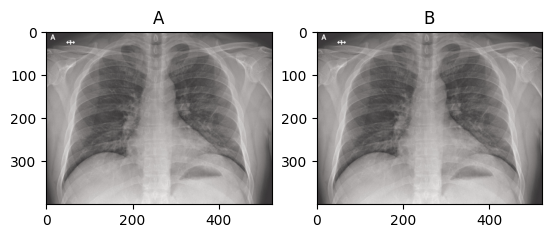

Set_class : train_Normal ___ total duplicates : 2
example:
A : 094.jpeg
duplicate with
B : 093.jpeg


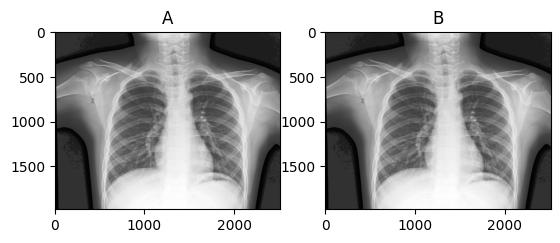

Set_class : train_Viral Pneumonia ___ total duplicates : 1
example:
A : 020.jpeg
duplicate with
B : 019.jpeg


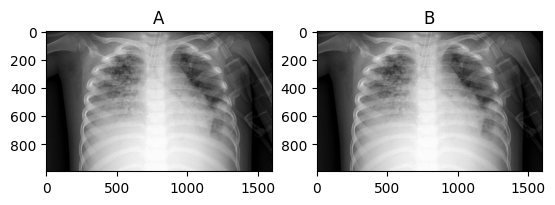

In [87]:
# will plot 1 duplicate example per set-class compination


for scl in list(d_map.keys()):
    
    scl_d = len(d_map[scl])
    
    if scl_d > 0:
        print(f"Set_class : {scl} ___ total duplicates : {scl_d}")
        print("example:")
        r = random.randint(0, scl_d-1)
        i0 = cv2.imread(d_map[scl][r][0])
        i1 = cv2.imread(d_map[scl][r][1])
        print(f"A : {os.path.basename(d_map[scl][r][0])}")
        print("duplicate with")
        print(f"B : {os.path.basename(d_map[scl][r][1])}")

        plt.subplot(1, 2, 1)
        plt.imshow(i0)  # Display the first image in the first subplot
        plt.title("A")

        plt.subplot(1, 2, 2)
        plt.imshow(i1)  # Display the second image in the second subplot
        plt.title("B")

        plt.show()  # Show the plot


### Delete All duplicate Files

In [100]:
counter = 0
for ii in d_map:
    for jj in d_map[ii]:
        os.remove(jj[0])
        counter = counter +1

print(f"{counter} files deleted in total")

4 files deleted in total


### Vizualization of dataset class composition

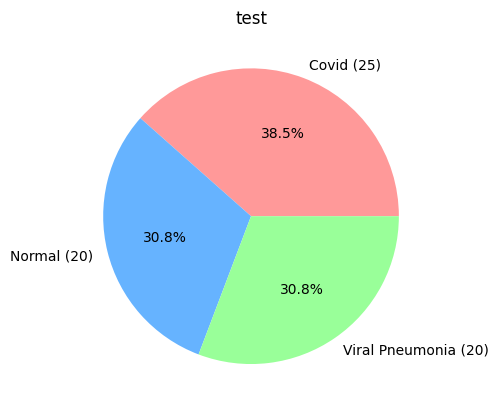

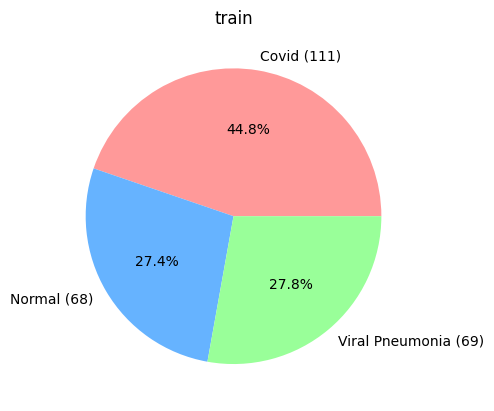

In [108]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffcc99', '#c2f0f0', '#ff6666', '#c2c2c2']

for s in list(u_map.keys()):
    sizes = []
    for cl in u_map[s].keys():
        sizes.append(len(u_map[s][cl]))
        pie_labels = [f"{label} ({count})" for label, count in zip(u_map[s].keys(), sizes)]

    plt.pie(sizes, labels=pie_labels, colors=colors, autopct='%1.1f%%')
    plt.title(s)
    plt.show()
# plt.show()

# END